# Linear Regression

https://github.com/yunjey/pytorch-tutorial

## Artificial dataset

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

# hyper parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.001

# toy dataset
# 15 samples, 1 features
x_train = np.array([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                    7.042, 10.791, 5.313, 7.997, 3.1], dtype=np.float32)

y_train = np.array([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                    2.827, 3.465, 1.65, 2.904, 1.3], dtype=np.float32)

x_train = x_train.reshape(15, 1)
y_train = y_train.reshape(15, 1)

# linear regression model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(input_size, output_size)

# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# train the model
for epoch in range(num_epochs):
    # convert numpy array to torch Variable
    # ndarray => Tensor => Variable
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch + 1, num_epochs, loss.data[0]))

Epoch [10/100], Loss: 10.0522
Epoch [20/100], Loss: 2.0177
Epoch [30/100], Loss: 0.6979
Epoch [40/100], Loss: 0.4801
Epoch [50/100], Loss: 0.4433
Epoch [60/100], Loss: 0.4361
Epoch [70/100], Loss: 0.4337
Epoch [80/100], Loss: 0.4322
Epoch [90/100], Loss: 0.4309
Epoch [100/100], Loss: 0.4295


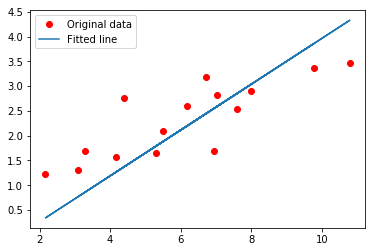

In [4]:
# plot the graph
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

## Boston house price dataset

- https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
- https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

In [50]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

(506, 13)
(506,)
(339, 13)
(167, 13)
(339,)
(167,)
epoch [1/10000], loss: 30510.0566 val_loss: 27647.2344
epoch [1001/10000], loss: 44.7724 val_loss: 54.9474
epoch [2001/10000], loss: 36.3821 val_loss: 43.7019
epoch [3001/10000], loss: 30.1500 val_loss: 37.3949
epoch [4001/10000], loss: 25.1708 val_loss: 33.4908
epoch [5001/10000], loss: 22.2849 val_loss: 31.6942
epoch [6001/10000], loss: 21.2487 val_loss: 31.3694
epoch [7001/10000], loss: 21.0222 val_loss: 31.4214
epoch [8001/10000], loss: 20.8919 val_loss: 31.2920
epoch [9001/10000], loss: 20.7399 val_loss: 31.0570


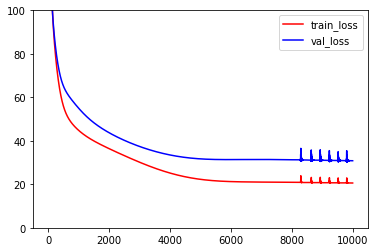

In [62]:
# hyper parameters
input_size = 13
output_size = 1
num_epochs = 10000
learning_rate = 0.01

boston = load_boston()
X = boston.data
y = boston.target
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# linear regression model
class BaselineModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(BaselineModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

model = BaselineModel(input_size, output_size)

# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

def train(X_train, y_train):
    inputs = Variable(torch.from_numpy(X_train).float())
    targets = Variable(torch.from_numpy(y_train).float())

    optimizer.zero_grad()
    outputs = model(inputs)

    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    return loss.data[0]

def valid(X_test, y_test):
    inputs = Variable(torch.from_numpy(X_test).float())
    targets = Variable(torch.from_numpy(y_test).float())
    
    outputs = model(inputs)
    val_loss = criterion(outputs, targets)
    
    return val_loss.data[0]
        
# train the model
loss_list = []
val_loss_list = []
for epoch in range(num_epochs):
    loss = train(X_train, y_train)
    val_loss = valid(X_test, y_test)

    if epoch % 1000 == 0:
        print('epoch [%d/%d], loss: %.4f val_loss: %.4f'
              % (epoch + 1, num_epochs, loss, val_loss))

    loss_list.append(loss)
    val_loss_list.append(val_loss)

# plot learning curve
plt.plot(range(num_epochs), loss_list, 'r-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, 'b-', label='val_loss')
plt.ylim((0, 100))
plt.legend()